In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Download time series data using yfinance
data = yf.download('AAPL', start='2018-01-01', end='2023-06-30')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


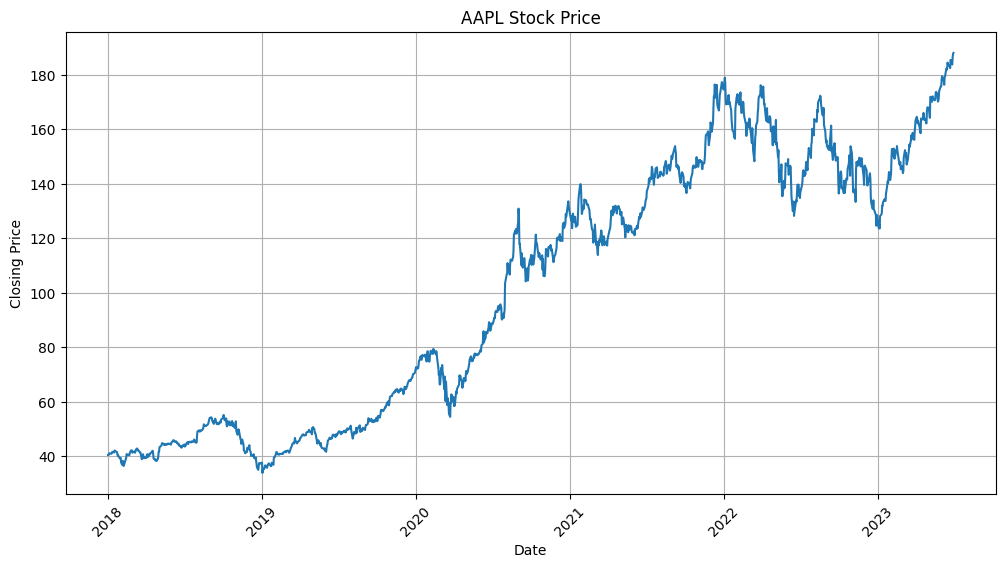

In [2]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('AAPL Stock Price')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

In [3]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


In [4]:
# Smooth the time series data using a moving average
window_size = 7
data['Smoothed'] = data['Close'].rolling(window_size).mean()


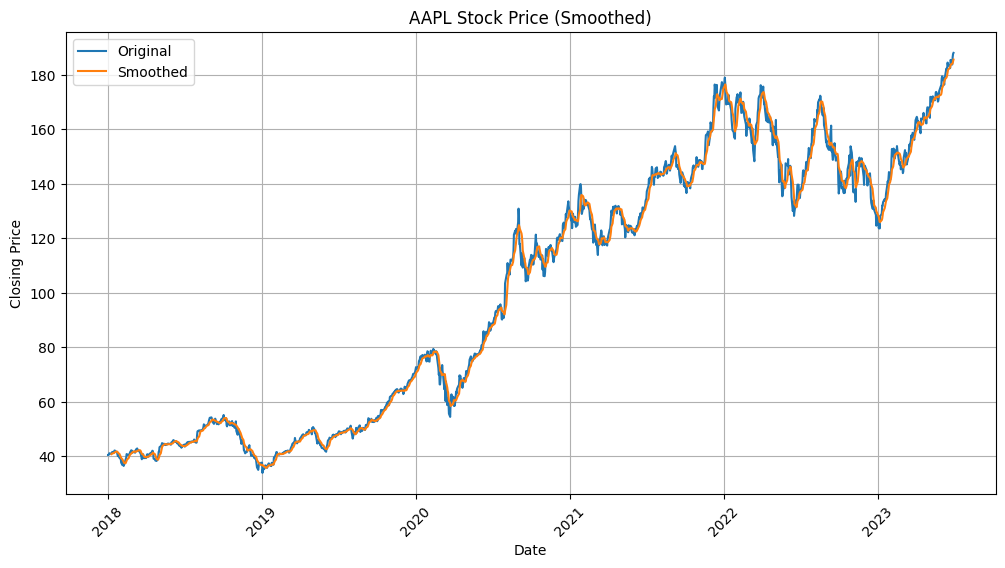

In [5]:
# Plot the smoothed data
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Original')
plt.plot(data['Smoothed'], label='Smoothed')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('AAPL Stock Price (Smoothed)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

In [9]:
data

Price,Close,High,Low,Open,Volume,Smoothed
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,


In [10]:
print(data.columns)

MultiIndex([(   'Close', 'AAPL'),
            (    'High', 'AAPL'),
            (     'Low', 'AAPL'),
            (    'Open', 'AAPL'),
            (  'Volume', 'AAPL'),
            ('Smoothed',     '')],
           names=['Price', 'Ticker'])


In [13]:
data.columns = ['_'.join(filter(None, map(str, col))) for col in data.columns]

In [14]:
print(data.columns)

Index(['Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL',
       'Smoothed'],
      dtype='object')


In [8]:

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Calculate z-scores
z_scores = (data['Close'] - data['Close'].mean()) / data['Close'].std()

# Remove outliers
data_cleaned = data[np.abs(z_scores) <= 3]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(data_cleaned.index, data_cleaned['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('AAPL Stock Price (Without Outliers)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

KeyError: 'Date'

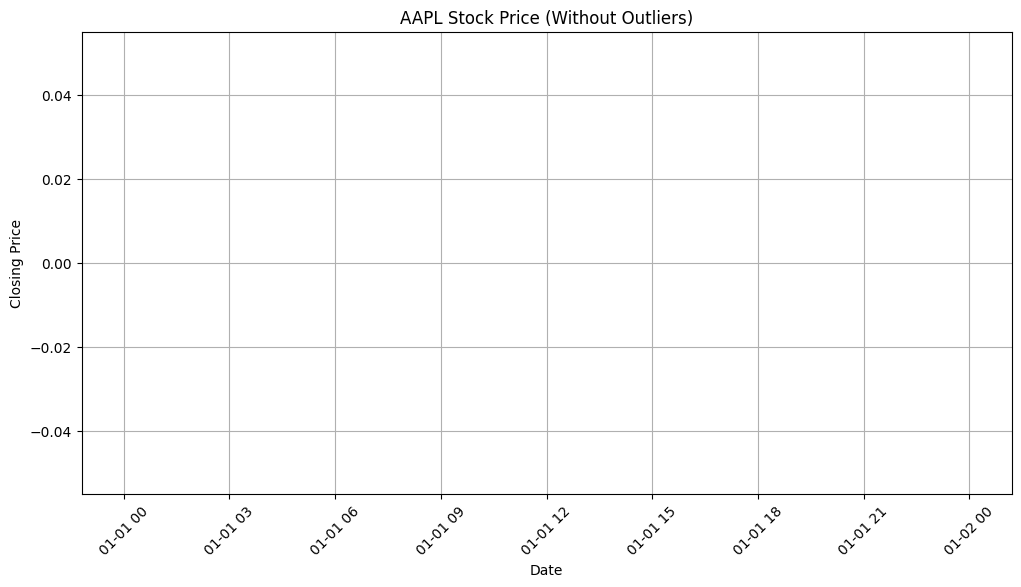

In [11]:
# Make sure the index is datetime (if it’s not already)
data.index = pd.to_datetime(data.index)

# Use the correct tuple key to access 'Close' prices for AAPL
close_prices = data[('Close', 'AAPL')]

# Calculate z-scores
z_scores = (close_prices - close_prices.mean()) / close_prices.std()

# Remove outliers
data_cleaned = data[np.abs(z_scores) <= 3]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(data_cleaned.index, data_cleaned[('Close', 'AAPL')])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('AAPL Stock Price (Without Outliers)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
